In [1]:
import glob
import torch
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from models.k_means import KMeans
from torchvision.transforms import v2

In [2]:
transform = v2.Compose([
    v2.ToImage(), 
    v2.Resize((408,300)),
    v2.ToDtype(torch.float32, scale=True)
])

In [3]:
image_dir = "data/Owls"
images = []
for image_path in glob.glob(image_dir+"/*.jpg"):
    img = cv.imread(image_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    img = transform(img)
    images.append(img)
    
images = torch.stack(images)
images.shape

torch.Size([18, 3, 408, 300])

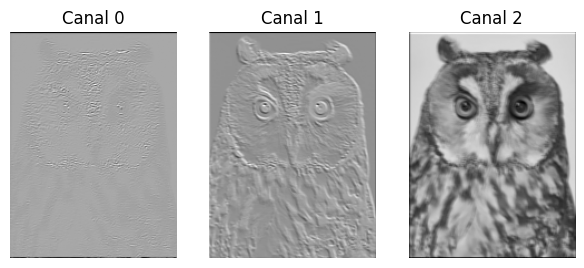

In [4]:
from utils.feature_extractor import extract_resnet_features
image = images[0]
image_features, features = extract_resnet_features(image.unsqueeze(0))
image_features = image_features.squeeze(0)
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 6, i+1)
    plt.imshow(image_features[i].cpu(), cmap='gray')
    plt.axis('off')
    plt.title(f'Canal {i}')
plt.show()

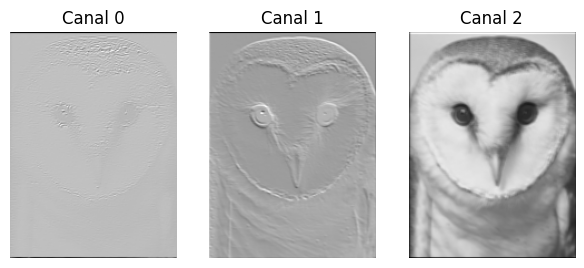

In [5]:
from utils.feature_extractor import extract_resnet_features
image = images[4]
image_features, features = extract_resnet_features(image.unsqueeze(0))
image_features = image_features.squeeze(0)
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 6, i+1)
    plt.imshow(image_features[i].cpu(), cmap='gray')
    plt.axis('off')
    plt.title(f'Canal {i}')
plt.show()

In [6]:
_, features = extract_resnet_features(images)
features = features.squeeze()
features.shape

torch.Size([18, 512])

In [13]:
n_cluster = 3
model = KMeans(n_cluster=n_cluster, max_iter=10)
model.fit(X=features)

iter: 0
iter: 1
Convergiu na iteração: 1


In [14]:
labels = model.predict(features)
labels

array([0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0])

Cluster 0 → 10 imagens


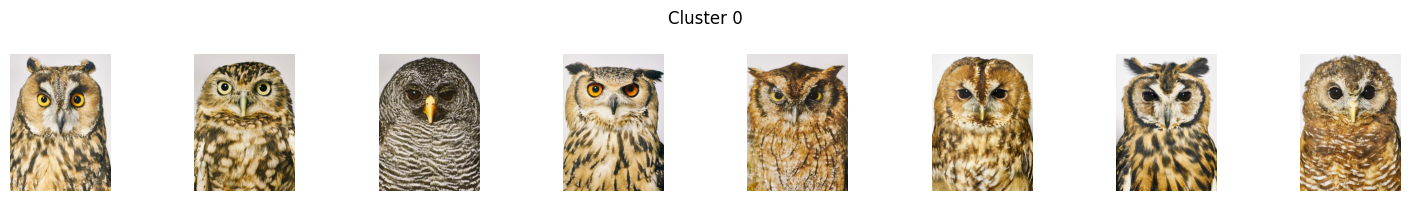

Cluster 1 → 4 imagens


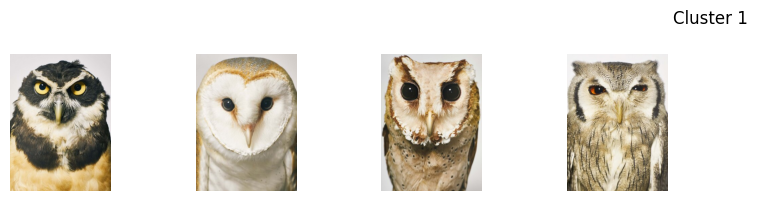

Cluster 2 → 4 imagens


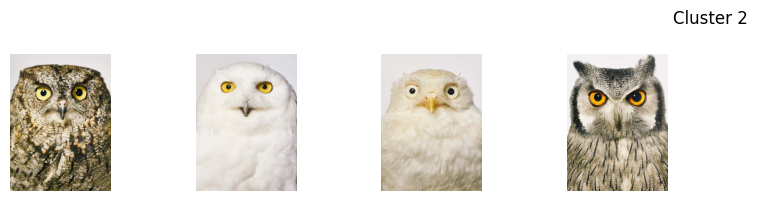

In [15]:
def show_clusters(images, cluster_labels, n_clusters, max_images=10):
    for cluster_id in range(n_clusters):

        idxs = (cluster_labels == cluster_id).nonzero()[0] # mascara 
        print(f"Cluster {cluster_id} → {len(idxs)} imagens")

        plt.figure(figsize=(15, 2))
        for i, idx in enumerate(idxs[:max_images]):
            img = images[idx]
            img = img.permute(1, 2, 0)
            plt.subplot(1, max_images, i + 1)
            plt.imshow(img.cpu())
            plt.axis('off')
        plt.suptitle(f"Cluster {cluster_id}")
        plt.tight_layout()
        plt.show()
        
show_clusters(images, labels, n_clusters=n_cluster, max_images=8)